# Novelty Detection

----------------------------------------------------
Machine Learning    

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* and *Emilio Parrado Hernández emipar@tsc.uc3m.es*

----------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

## Novelty detection problems

**Novelty detection** is one of the typical unsupervised learning scenarios. Mathematically it can be understood as the **learning of the limits** of the data distribution.

### Applications that demand novelty detection:

- Cleaning training sets of **outliers**.
- Deciding when the statistics governing data distributions have changed enough to require a model update.

Although the models we are going to see in this session can be used in both applications, for simplicity, we are going to focus on **outlier detection**.

## Outlier detection

Outliers are rare values that deviate from other observations on data; in other words, an outlier is an observation that is far from the rest of the observations or the center of mass of observations. Outlier detection estimators, thus, try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

Outliers can be caused human, instrumental or processing errors, for example, during the data acquisition, recording or processing or, measurement or experimental errors.

In machine learning is important to identify and remove outliers from data when training algorithms for predictive modeling.
Outliers can skew statistical measures and data distributions, providing a misleading representation of the underlying data and relationships. Removing outliers from training data prior to modeling can result in a better fit of the data and, in turn, more skillful predictions.


<img src='http://www.tsc.uc3m.es/~emipar/BBVA/AVANZATED/novelty_detection.png' width=500 />

As outlier detection consists in detecting the observations that are far from the rest of the observations, most of the methods are based in probability density estimation, such us using the **Gaussian Mixture Model (GMM)**. However, we can also use specific formulations of the SVM  as the  **One-class SVM (1-SVM)**.

But, besides, sklearn includes other three specific approaches:
* **Isolation Forest**
* **Minimum Covariance Determinant**
* **Local Outlier Factor**

## One class SVMs

The aim is to extend the SVM methodology (kernels, soft margin, sparsity, robust optimisation) to the resolution of novelty detection problems.

SVM is a classification algorithm, but in a novelty detection problem we are only going to have examples of the positive class...

There are two approaches to **one-class SVM**:
- Binary classification where the positive class consists of all observations in the training set and the negative class is the origin (point $\mathbf 0$) of the feature space.
- Hyper-sphere encompassing all observations in the training set.


### Classification against origin

We define the following binary classification problem **in a feature space** induced by a **kernel** function:
- The positive class is the examples of the training set on which we want to apply outlier detection.
- The negative class is the origin of coordinates in the feature space (the point $\bf 0$).
- The classification problem consists of finding the hyperplane that separates the observations of the training set from the origin with **maximum margin**.
- The formulation with **soft margin** allows some of the observations to fall on the wrong side of the margin, i.e., to be declared *outliers*, in exchange for obtaining a **softer** novelty detection function.

all data same class and the other class gona be the origin. and find the plane that separate far away the data from the origin.

all the training data tiene que estar en el positive side of the margin. We also have slock variables to relax the problem (puede haber training data qthat lies n the margin or on the wrong side).

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/AVANZATED/ocsvm_plano.png' width=500 />

#### Formulation

$$
\min_{\mathbf w, b, \xi_i} -b + \frac{1}{2}\|\mathbf w\|^2 + C\sum_{i=1}^n{\xi_i}\\
\mbox{s.t: } \mathbf w^\top \phi(\mathbf x_i) \ge b - \xi_i \quad \mbox{all samples on the correct side of the margin} \\
\mbox{and } \xi_i \ge 0, \quad i=1,\dots,n
$$

Dual formulation:

$$
\min_{\mathbf a} \frac{1}{2}\mathbf aK\mathbf a^\top \\
\mbox{s.t.}  \sum_{i=1}^na_i=1\\
\mbox{and } ~~~ 0\le a_i\le C \quad i=1,\dots,n
$$

where:
- $\mathbf a$ are the coefficients of the dual problem (Lagrange multipliers of the constraints in the optimisation), i.e. $\mathbf w = \Phi^\top \mathbf a$
- $K$ is the kernel matrix $K=\Phi\Phi^\top$, $K_{i,j} = \kappa(\mathbf x_i, \mathbf x_j)$
- The *outliers* verify $\sum_{i=1}^n{a_i\kappa(\mathbf x_i, \mathbf x)} + b <0$

b is the bias because the origin is far away from the hyperplane. C number of outliers that we can have.

### Hyper-sphere encompassing the data

We also start by selecting a **kernel** function that induces a **feature space** on which the observations of the training set are projected.

The problem to be solved is to find the **radius** and **centre** of the smallest sphere of the feature space containing all the projections of the training observations.

The **soft margin** formulation allows some observations to fall outside the sphere, being considered as **outliers**.

we map the data into a high feature space.

#### Formulation of the One Class SVM with Hyperspheres

The optimization problem is to find the **hypersphere of smallest radius** that encompasses all the observations in the training set.

To define a hypersphere we need to specify the **centre** $\mathbf c$ and the **radius** $r$.

$$
\min_{\mathbf c, r} r^2
$$
$$~~ \mbox{s.t.} ~
\|\mathbf \phi(\mathbf x_i) - \mathbf c\|^2 \le r^2, \qquad i=1,\dots, n
$$

We can adapt this formulation to a **soft margin** situation, and allow some observations to be **outside the hypersphere**. This is done by introducing the *slack variables* and the hyperparameter $C$ as is done in the SVM for classification:

$$
\min_{\mathbf c, r, \xi_i} r^2 + C\sum_{i=1}^n{\xi_i} \\ \mbox{s.t} ~~ \|\mathbf \phi(\mathbf x_i) - \mathbf c\|^2 \le r^2 + \xi_i, \qquad i=1,\dots, n \\ \mbox{and } \xi_i \ge 0, \qquad i=1,\dots, n
$$





we want that the data lies in the sphere but introducing the slack varaibles that the training data that is an outliers is outside the sphere.

To solve the optimisation we first introduce the constraints on the functional using Lagrange multipliers.

$$
\min_{\mathbf c, r, \xi_i} \max_{\alpha_i, \eta_i}~~~ r^2 + C\sum_{i=1}^n{\xi_i} +\sum_{i=1}^n{\alpha_i\left( \|\mathbf \phi_i - \mathbf c\|^2 - r^2 - \xi_i\right)}-\sum_{i=1}^n \eta_i\xi_i
$$

Optimising with respect to $r$

$$
2r  -2\sum_{i=1}^n{r\alpha_i} = 0 \Rightarrow \sum_{i=1}^n{\alpha_i}=1
$$




Optimising with respect to $\mathbf c$

$$
\nabla_{\mathbf c}\left \{\sum_{i=1}^n{\alpha_i}\left( \mathbf \phi_i^\top\mathbf \phi_i - 2 \mathbf c^\top \mathbf \phi_i + \mathbf c^\top \mathbf c\right) \right \}= \mathbf 0 \Rightarrow \mathbf c = \sum_{i=1}^n{\alpha_i\mathbf \phi_i}
$$

Finally, optimising with respect to the *slack* varaibles $\xi_i$

$$
C - \alpha_i -\eta_i = 0 \Rightarrow 0 \le \alpha_i\le C
$$

Grouped together, the problem to be solved is

$$
\max_{\alpha_i}  \sum_{i=1}^n{\alpha_i\mathbf \phi_i^\top \mathbf \phi_i} -\sum_{i,j=1}^n{\alpha_i\alpha_j\mathbf \phi_i^\top\mathbf \phi_j}
$$

subject to:

$$
\sum_{i=1}^n{\alpha_i}=1
$$
and
$$
0\le\alpha_i\le C,\qquad i=1,\dots,n
$$

Introducing a kernel function that replaces the scalar products in the feature space

$$
\max_{\alpha_i}  \sum_{i=1}^n{\alpha_i \kappa(\mathbf x_i, \mathbf x_i)} -\sum_{i,j=1}^n{\alpha_i\alpha_j\kappa(\mathbf x_i,\mathbf x_j)} = \max_{\alpha_i}  \boldsymbol{\alpha}^\top K_{\mbox{diag}} -\boldsymbol{\alpha}^\top K \boldsymbol{\alpha}
$$

subject to
$$
\sum_{i=1}^n{\alpha_i}=1
$$
and
$$
0\le\alpha_i\le C,\qquad i=1,\dots,n
$$

As in the SVM for classification, the values of $\alpha_i$ will indicate the type of samples we have:
* If $\alpha_i=0$ the data is on the correct side of the margin, in this case inside the circumference and is typical.

* For $\alpha_i>0$, the data are support vectors (SVs) and in this case we have two cases:
  * $0<\alpha_i<C$, in this case $\xi =0$ and these data fall on the circumference border.
  * $\alpha_i=C$, these data have $\xi >0$ and fall outside the circumference and are the outliers.

#### Example 1

Let's assume that we have already **arrived at the feature space**, i.e. that the points represented in the figure are the projections of the points in the feature space.

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

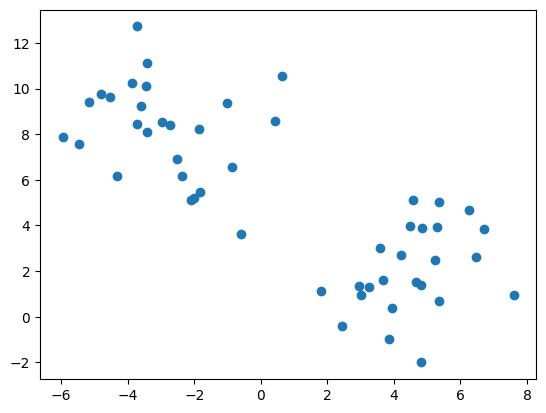

In [ ]:
n_samples = 50
X = datasets.make_blobs(n_samples=n_samples,
                            centers=2,
                            cluster_std=2.,
                            random_state=42)[0]
plt.figure()
plt.scatter(X[:,0], X[:,1])

the next library is an optimizer

In [ ]:
from cvxopt import matrix, solvers
import numpy as np
def separable_ocsvm_sphere_with_cvxopt(xall):
    nn = xall.shape[0]
    Kd = np.sum(xall * xall, 1)

    q = matrix(-Kd)
    P = matrix(2*xall.dot(xall.T))

    G = matrix(-np.eye(nn), (nn,nn))
    h = matrix(0.0, (nn,1))

    # sum(a_iy_i)=0
    A = matrix(1.0,(1,nn))
    b = matrix(1.0)

    sol=solvers.qp(P, q, G, h, A, b)
    a = np.array([cc for cc in sol['x']])

    c = a.reshape(1,-1).dot(xall) #center
    ii = np.argmax(a) # vector soporte
    r=np.linalg.norm(xall[ii]-c[0]) #radius
    return c, r, a

In [ ]:
c, r, a = separable_ocsvm_sphere_with_cvxopt(X)

     pcost       dcost       gap    pres   dres
 0: -1.4032e+04 -7.3953e+01  5e+04  2e+02  6e-01
 1: -2.0246e+02 -7.3938e+01  5e+02  2e+00  6e-03
 2: -6.8580e+01 -7.2981e+01  8e+00  1e-02  4e-05
 3: -7.2243e+01 -7.2420e+01  3e-01  3e-04  9e-07
 4: -7.2389e+01 -7.2392e+01  3e-03  3e-06  1e-08
 5: -7.2391e+01 -7.2391e+01  3e-05  3e-08  1e-10
Optimal solution found.


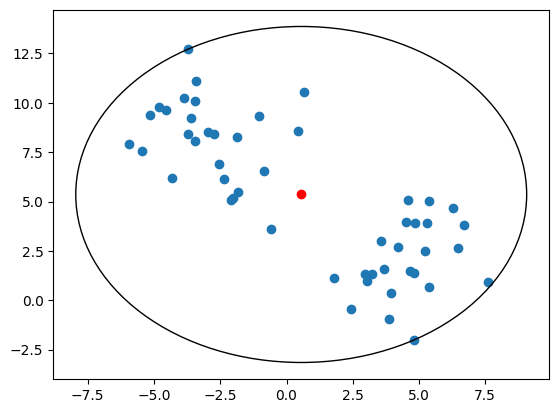

In [ ]:
ff,aa = plt.subplots(1,1)
aa.scatter(X[:,0], X[:,1])
aa.scatter([c[0,0]],[c[0,1]],color='red')
circle1=plt.Circle(c[0], r, fill=False)
_=aa.add_patch(circle1)

In [ ]:
a

array([ 3.29316892e-09,  4.99999696e-01,  1.10190320e-08, -5.84855335e-10,
        1.25878921e-08,  5.54694896e-09,  2.81363799e-09,  1.14902465e-08,
        3.01496361e-08, -2.26917936e-09,  1.15670261e-08,  1.97340395e-08,
        1.79614040e-10,  8.32502445e-09,  2.53688637e-08,  5.44823483e-09,
        3.37371740e-09,  1.89322915e-08, -1.30104798e-09,  3.95590261e-09,
        2.06013319e-06,  8.29323469e-09,  1.54583499e-08,  3.99105768e-09,
       -1.91381844e-09,  4.77540536e-09,  2.96871920e-08,  4.81186250e-09,
        6.12177840e-09,  4.99997870e-01,  8.18665615e-09,  3.79821927e-09,
        4.25018366e-09,  2.44360522e-08,  1.08087088e-08, -1.56372867e-09,
        8.59371532e-09,  5.47202720e-09,  1.81347108e-09, -1.20635307e-09,
        1.26662126e-08,  1.30816275e-08,  1.11638774e-08,  4.60577555e-09,
        1.33296213e-08,  5.24218289e-09,  1.36811606e-09,  2.42832351e-09,
        3.64755012e-09,  2.55516936e-10])

#### Example 2

Now the data are in the **original space**, and we will use an RBF kernel as the *kernel* of the one class SVM.

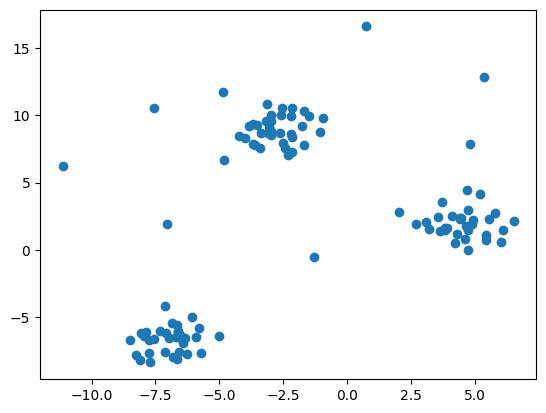

In [ ]:
n_samples = 100
X = np.vstack((datasets.make_blobs(n_samples=n_samples,
                            centers=3,
                            cluster_std=1.,
                            random_state=42)[0],
               datasets.make_blobs(n_samples=10,
                            centers=1,
                            cluster_std=5.,
                            random_state=42)[0]
              ))
plt.figure()
_=plt.scatter(X[:,0], X[:,1])

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
def kernel_ocsvm_sphere_with_cvxopt(K, C):
    nn = K.shape[0]
    q = matrix(-np.ones(nn), (nn,1))
    P = matrix(2*K)

    G = matrix(np.vstack((-np.eye(nn),
                          np.eye(nn)))
               )
    h = matrix(np.vstack((np.zeros(nn).reshape(-1,1),
                          C*np.ones(nn).reshape(-1,1)))
               )

    # sum(a_iy_i)=0
    A = matrix(1.0,(1,nn))
    b = matrix(1.0)

    sol=solvers.qp(P, q, G, h, A, b)
    a = np.array([cc for cc in sol['x']])

    return a

In [ ]:
C=.05
gamma=.1
K=rbf_kernel(X, gamma=gamma)
alfa = kernel_ocsvm_sphere_with_cvxopt(K,
                                       C=C)

     pcost       dcost       gap    pres   dres
 0: -9.1005e-01 -6.5017e+00  2e+02  1e+01  3e-16
 1: -8.7561e-01 -6.0923e+00  7e+00  1e-01  4e-16
 2: -8.5986e-01 -1.2615e+00  4e-01  2e-16  3e-16
 3: -8.8732e-01 -1.0296e+00  1e-01  1e-16  3e-16
 4: -8.9732e-01 -9.3415e-01  4e-02  9e-17  3e-16
 5: -9.0468e-01 -9.1873e-01  1e-02  1e-16  3e-16
 6: -9.0705e-01 -9.1230e-01  5e-03  9e-17  3e-16
 7: -9.0841e-01 -9.0944e-01  1e-03  9e-17  3e-16
 8: -9.0881e-01 -9.0886e-01  5e-05  1e-16  3e-16
 9: -9.0882e-01 -9.0884e-01  2e-05  1e-16  3e-16
10: -9.0883e-01 -9.0883e-01  5e-07  2e-16  3e-16
Optimal solution found.


To calculate the radius of the sphere we need to identify a support vector that lies just above the surface of the sphere, i.e. at a distance from the centre of the sphere equal to the radius

In [ ]:
tol = 1e-6 #tolerance to avoid numerical approximation errors

# we look for Support Vectors, those with alpha > 0
is_svs = alfa > tol

# observations within the sphere: inliers
within_margin = alfa < (C-tol)

# outliers are support vectors having a Lagrange multiplier equal to C
outliers = is_svs &( alfa >= (C-tol))

In [ ]:
# Support vectors on the surface of the sphere, those having positive alpha (greater than zero) but less than C

ii = np.where(is_svs & within_margin)[0]

The radius can be calculated from the constraint of being inside the sphere of any of the support vectors resting on the surface of the sphere.

In [ ]:
# we calculate the distance to the centre of all observations
distance_to_center = np.sqrt(1 - 2*K.dot(alfa.reshape(-1,1)) + alfa.reshape(1,-1).dot(K).dot(alfa))

In [ ]:
# the radius is calculated by averaging the radii of the support vectors on the sphere's surface
radius = np.mean(distance_to_center[ii])

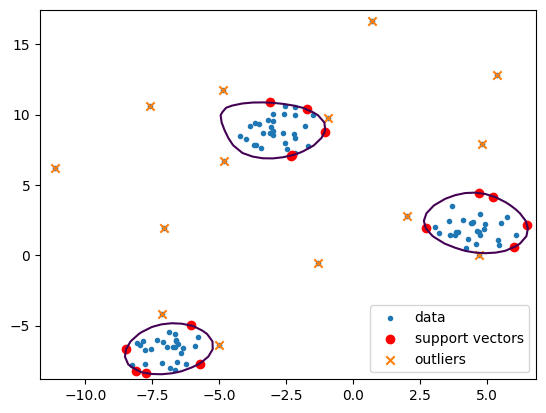

In [ ]:
xmin = np.min(X[:,0])
xmax = np.max(X[:,0])
Xg = np.linspace(xmin-.05*np.absolute(xmin),
               xmax + .05*np.absolute(xmax),
               50) # or whatever values for x
ymin = np.min(X[:,1])
ymax = np.max(X[:,1])
Yg = np.linspace(ymin-.05*np.absolute(ymin),
               ymax + .05*np.absolute(ymax),
               50)   # or whatever values for y

XX, YY = np.meshgrid(Xg, Yg)
Xshape = XX.shape
Z = np.hstack((XX.reshape(-1,1), YY.reshape(-1,1)))
Kg = rbf_kernel(Z, X, gamma=gamma)
zz = np.sqrt(1 - 2*Kg.dot(alfa.reshape(-1,1)) + alfa.reshape(1,-1).dot(K).dot(alfa))
zz = zz.reshape(Xshape)

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='.', label='data')

plt.scatter(X[ii,0], X[ii,1],color='r',label='support vectors')
plt.scatter(X[outliers,0], X[outliers,1], marker='x', label='outliers')

plt.contour(XX, YY, zz, [radius])
_=plt.legend(loc=4)



The contour in the figure above is the representation of the contour of the sphere in the input space, i.e. the 3 groups that appear in the image within the contours correspond to points that are inside the sphere in the feature space. The points marked with the crosses are outside the sphere in feature space.

## OneClassSVM in scikit learn

The class [`OneClassSVM`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) contains an implementation of the algorithm based on sorting the training set **against the coordinate origin**.

The formulation it employs is a little different from the one we have seen. It is derived from the $\nu$-SVM, which basically replaces the hyperparameter $C$ that controls the soft margin with another hyperparameter $\nu$ that specifies the ratio of observations in the training set that are expected to end up as support vectors.

The way this class is used is very similar to that of the SVC class. Continuing with the example from before

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
ocsvm = OneClassSVM(kernel='rbf',
                   nu=0.2, # parameter controling the percentage of SVs --> In  training data there is no more than a 20% of outliers. Coomon numbers 0.05 or 0.01
                   gamma=.25).fit(X)


In [ ]:
pred = ocsvm.predict(X) # when the output is positive is an inliers and negative is an outlier
outliers = pred==-1
svs=ocsvm.support_

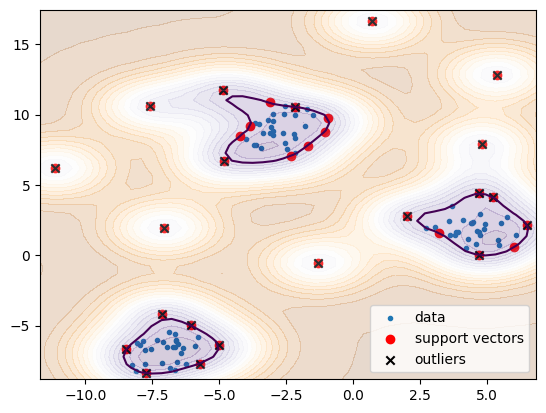

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='.', label='data')

plt.scatter(X[svs,0], X[svs,1],color='r',label='support vectors')
plt.scatter(X[outliers,0], X[outliers,1], marker='x', color='black', label='outliers')

zz = ocsvm.decision_function(Z).reshape(Xshape)
cf=plt.contourf(XX, YY, zz, 20, cmap='PuOr', alpha=0.2)
plt.contour(XX, YY, zz, [0])
_=plt.legend(loc=4)

we can not apply cross-validation here because there is no labels. No easy to select the parameters.

when gamma is too small , wide kernel --> everything gona be inside

hamma high: high number of SV

a good solution may be to study the suport vector along the gamma parameter. A lot of SV tend to overfit.

## Other approaches for novelty detection
Now, let's introduce the other methods that we can find in sklearn for the novelty detection.


### Isolation Forest

The [`IsolationForest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest) *isolates* observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node. The most typical data will need more iterations (splittings) or longer path lengths to be isolated; so this path length, averaged over a forest of such random trees, is a measure of normality and our decision function for outlier detection. Note that random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

Perhaps the most important hyperparameter in the model is the `contamination` argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

if the data is on top trees of many trees --> outlier

if it is in the bottom --> inlier

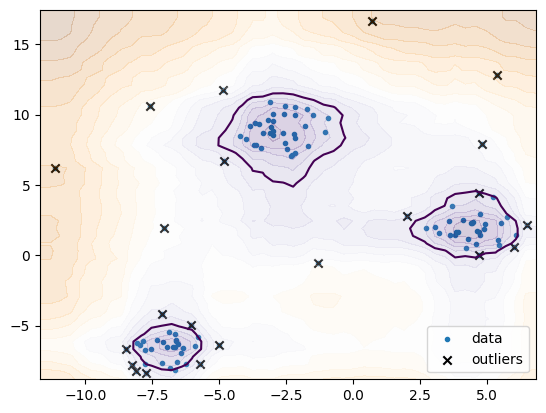

In [ ]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset
iForest = IsolationForest(contamination=0.2) #contamination is the same as nu in SV
youtliers = iForest.fit_predict(X) #outliers --> negatives

outliers =  np.where(youtliers == -1)[0]

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='.', label='data')
plt.scatter(X[outliers,0], X[outliers,1], marker='x', color='black', label='outliers')

zz = iForest.decision_function(Z).reshape(Xshape)

cf=plt.contourf(XX, YY, zz, 20, cmap='PuOr', alpha=0.2)
plt.contour(XX, YY, zz, [0])
_=plt.legend(loc=4)

### Local Outlier Factor

The [local outlier factor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor), or LOF for short, measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by a KNN, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors.

This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the *curse of dimensionality*.

Here we find two parameters to adjust, the `contamination` level and the number of neighbors (set to 20 by default).

Based in distances.

neighbors close --> inliers

neighbors far away --> outliers

The threshold --> contamination factor.

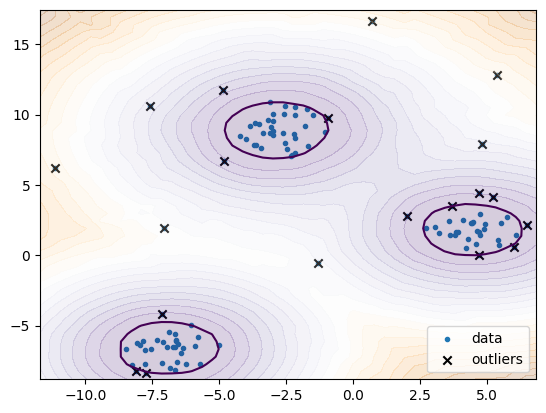

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
lof = LocalOutlierFactor(novelty=True, contamination=0.2)
lof.fit(X)
youtliers = lof.predict(X)

outliers =  np.where(youtliers == -1)[0]

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='.', label='data')
plt.scatter(X[outliers,0], X[outliers,1], marker='x', color='black', label='outliers')

zz = lof.decision_function(Z).reshape(Xshape)

cf=plt.contourf(XX, YY, zz, 20, cmap='PuOr', alpha=0.2)
plt.contour(XX, YY, zz, [0])
_=plt.legend(loc=4)

because the use of euclidean distnace the solution is spherical than the others.

### Minimum Covariance Determinant or Elliptic Envelope

If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers. For example, if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution.
This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier.

The [EllipticEnvelope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope) class of sklearn implements this approach and it provides the `contamination` argument that defines the expected ratio of outliers to be observed.

in this case  the data is mapped in a high espherical space but may be not a good option

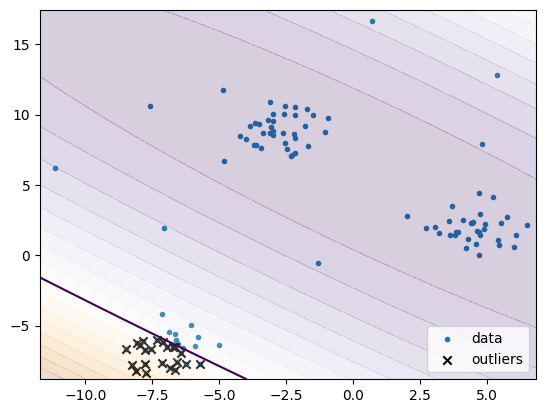

In [ ]:
from sklearn.covariance import EllipticEnvelope
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.2)
youtliers = ee.fit_predict(X)

outliers =  np.where(youtliers == -1)[0]

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='.', label='data')
plt.scatter(X[outliers,0], X[outliers,1], marker='x', color='black', label='outliers')

zz = ee.decision_function(Z).reshape(Xshape)

cf=plt.contourf(XX, YY, zz, 20, cmap='PuOr', alpha=0.2)
plt.contour(XX, YY, zz, [0])
_=plt.legend(loc=4)


### Gaussian Mixture Models (GMM)

The [mixing models](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch20.pdf) are a type of probabilistic data model that allows approximate the probability density of the data and, thus, use this information to detect values far from the distribution.
A GMM model will adjust a parameterized probability density function to our data as follows:

\begin{align}
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{\Sigma}_k)
\end{align}

where

- $\pi_k$ is the probability that the data comes from the $k$-th gaussian.


- We assume that all data assigned to the $k$-th gaussian are distributed according to a Gaussian mean of $\mathbf{\mu}_k$ and a $\mathbf{\sigma}_k$ covariance matrix.


- $(\pi_1,\ldots,\pi_K)$, $(\mathbf \mu_1,\ldots,\mathbf \mu_K)$, $(\mathbf{\Sigma}_1,\ldots,\mathbf{\Sigma}_K)$ are the **model parameters**.

These model parameters are chosen to maximize the **probability of already observed data or evidence**:


$$ \max_{(\pi_1,\ldots,\pi_K),(\mathbf{\mu}_1,\ldots,\mathbf{\mu}_K), (\mathbf{\Sigma}_1,\ldots,\mathbf{\Sigma}_K)}  ~~\sum_{n=1}^{N} \log  p(\mathbf{x}_n) $$

This problem is solved numerically by an iterative algorithm known as **EM** (Expectation-Maximization).

Although this approach is not included in sklearn as a novelty detection technique, we can use its [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) implementation for data modeling and clustering, as it is commonly used.

Note that this approach can be considered an extension of Elliptic Envelope approach where instead of considering a single gaussian to model our data, we use a mixture of gaussian to be able to model more complex data distributions.


we cannot apply ML bevuase there is no close solution. We apply the Expectation-maximization method.

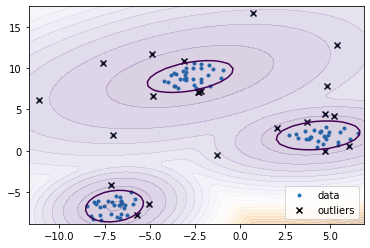

In [ ]:
from sklearn.mixture import GaussianMixture

# As we know the dataset, we set K=3 (otherwise this parameters has to be selected)
gmm = GaussianMixture(n_components=3,covariance_type='full',n_init=20)

gmm.fit(X) #all the parameter with EM method

log_probs = gmm.score_samples(X)#log of the probabilities

y_outlier_pred = np.zeros([X.shape[0],])
frac = 0.2 # We set the number of contaminated data 20% are outliers
outliers = np.argsort(log_probs)[:int(np.round(X.shape[0]*frac))]
th_outlier = np.sort(log_probs)[int(np.round(X.shape[0]*frac))]

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='.', label='data')
plt.scatter(X[outliers,0], X[outliers,1], marker='x', color='black', label='outliers')

zz = gmm.score_samples(Z).reshape(Xshape)

cf=plt.contourf(XX, YY, zz, 20, cmap='PuOr', alpha=0.2)
plt.contour(XX, YY, zz, [th_outlier])
_=plt.legend(loc=4)

For this model we can plot the contour curves, that is, the curves over space $(x_1,x_2)$ with equal probability $p(\mathbf{x})$. Also the learned $p(\mathbf{x})$ in a 3D figure. In this way, we can analyze the data distribution.

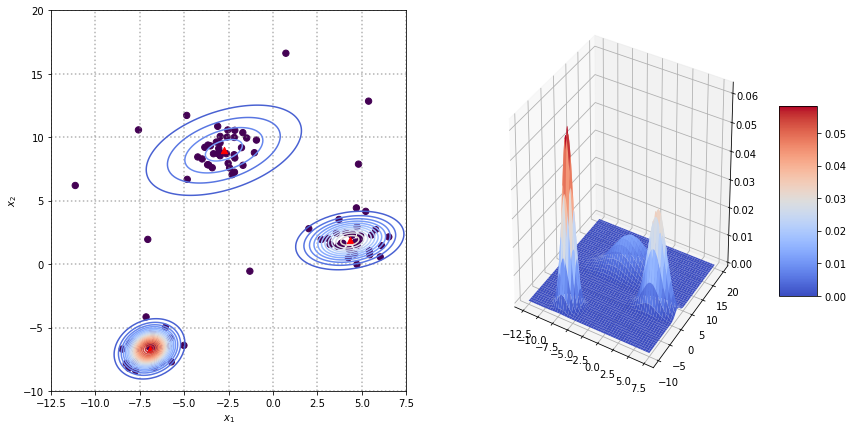

In [ ]:
from scipy.stats import multivariate_normal as mvn #Multivariate normal distribution
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Lets plot the pdf contour plot
intervals = 200

# We created a grid
x = np.linspace(-12.5, 7.5, intervals)
y = np.linspace(-10, 20, intervals)

xx,yy = np.meshgrid(x,y)

xys = np.vstack([xx.ravel(), yy.ravel()]).T

# We evaluate p(x) for each point of the grid
K=3
Zgmm = np.zeros(len(xys))
for k in range(K):
    Zgmm += gmm.weights_[k]*mvn(gmm.means_[k,:], gmm.covariances_[k]).pdf(xys)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1)

Zgmm = Zgmm.reshape([intervals,intervals])
ax.contour(xx, yy, Zgmm, 20, cmap=cm.coolwarm)
ax.scatter(X[:, 0], X[:, 1], c=y_outlier_pred, s=40, cmap='viridis')
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=40, marker='^', facecolor='red')

ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(xx, yy, Zgmm, cmap=cm.coolwarm)
ax.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dotted', lw=1.5)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


if youknow the distributions, we can guess if the point is an outlier or inlier.

So we'll hva threshold if the probability is higher than the threshold ---

compute the probability of the inliers, then the threshold would be the min of these probabilities.

## Example with real data

Let's load the MNIST data set

In [ ]:
#data = np.loadtxt("../../MACHINE_LEARNING_INTERMEDIO/MVA/mnist_test.csv", delimiter=",")
data = np.loadtxt("http://www.tsc.uc3m.es/~vanessa/data_notebooks/mnist/mnist_test.csv", delimiter=",")
fac = 0.99 / 255
X=np.asfarray(data[:, 1:]) * fac + 0.01
Y = np.array([int(cc) for cc in data[:, :1]])

And let's consider that `7`'s are normal data

In [ ]:
clase = 7
datos = X[Y==clase,:]

In [ ]:
ocsvm = OneClassSVM(kernel='rbf',
                   nu=0.01, # to control the number of SVs
                   gamma=.0025).fit(datos)


In [ ]:
def plot_ten_examples(X,y, score=None):
  nrows = 2
  ncols = 5
  ff,aa = plt.subplots(nrows, ncols,figsize=(12,2))
  ii = 0
  for rr in range(nrows):
    for cc in range(ncols):
      aa[rr][cc].set_axis_off()
      aa[rr][cc].imshow(X[ii].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
      if score is None:
        aa[rr][cc].set_title('Target: {0:d}'.format(y[ii]))
      else:
        aa[rr][cc].set_title('Target: {0:d}, score:{1:.3f}'.format(y[ii], score[ii]))
      ii += 1
  ff.tight_layout()

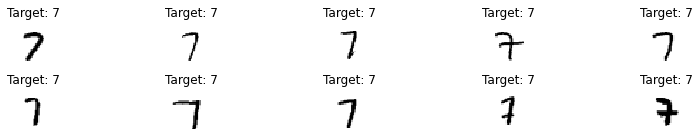

In [ ]:
plot_ten_examples(datos[25:35,:],[clase]*10)

In [ ]:
score = ocsvm.decision_function(datos)
orden = np.argsort(score)

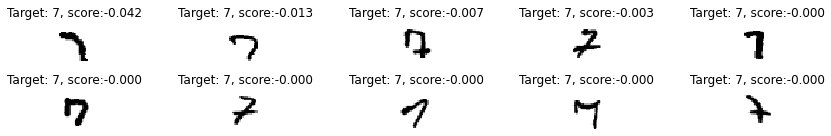

In [ ]:
# The most atypical data
plot_ten_examples(datos[orden[:10],:],[clase]*10, score[orden[:10]])

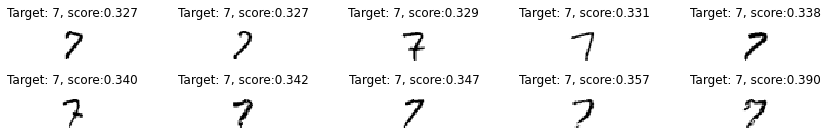

In [ ]:
# The most typical data
plot_ten_examples(datos[orden[-10:],:],[clase]*10, score[orden[-10:]])

Let's analyze the model behaviour when we pass `2`'s

In [ ]:
clase3 = 2
datos3 = X[Y==clase3,:]

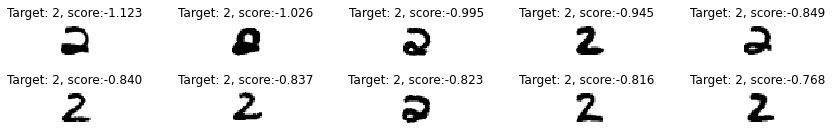

In [ ]:
score3 = ocsvm.decision_function(datos3)
orden3 = np.argsort(score3)
plot_ten_examples(datos3[orden3[:10],:],[clase3]*10, score3[orden3[:10]]) #the numbers that has nothing to be with sevens --< consider outliers

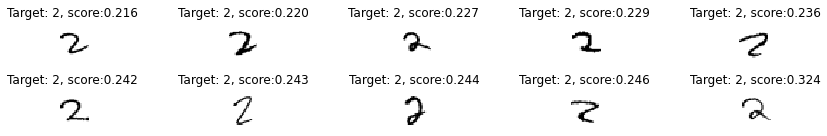

In [ ]:
plot_ten_examples(datos3[orden3[-10:],:],[clase3]*10, score3[orden3[-10:]]) #numbers that resamble sevens --> consider inliers